In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
full = cv2.imread('DATA/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

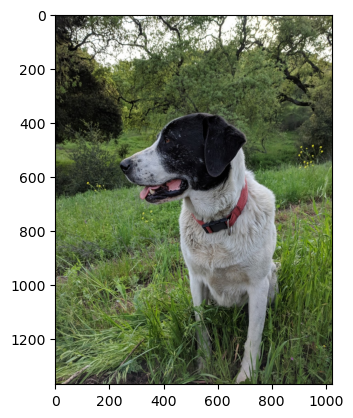

In [3]:
plt.imshow(full)

In [4]:
face = cv2.imread('DATA/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

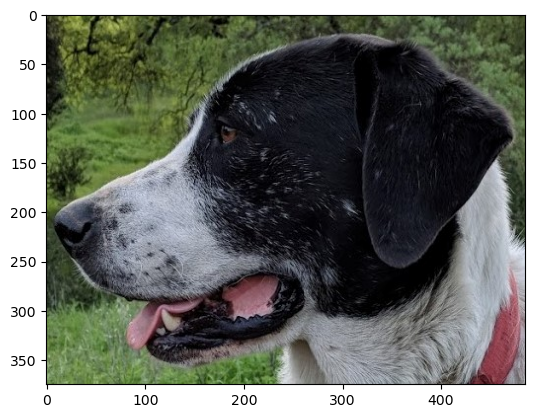

In [5]:
plt.imshow(face)

In [8]:
 
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

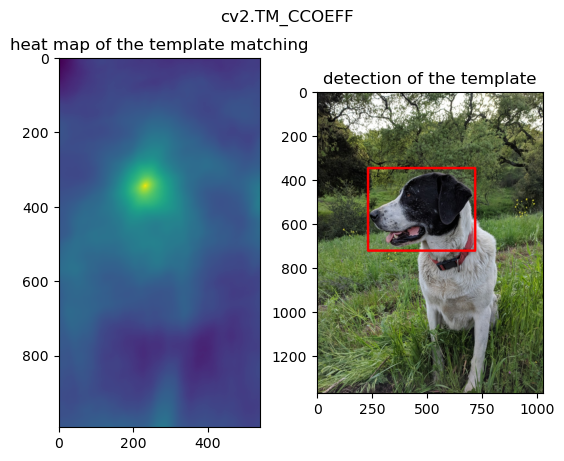

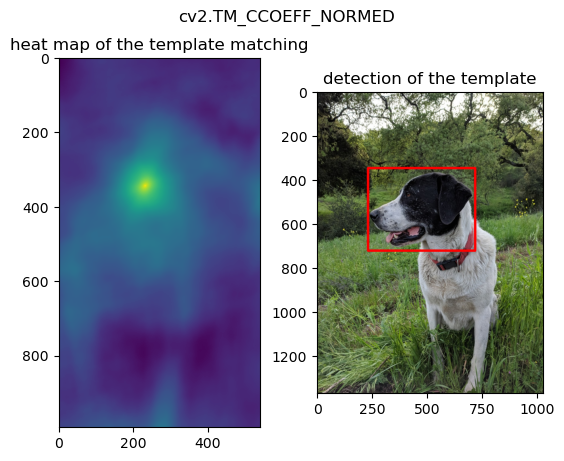

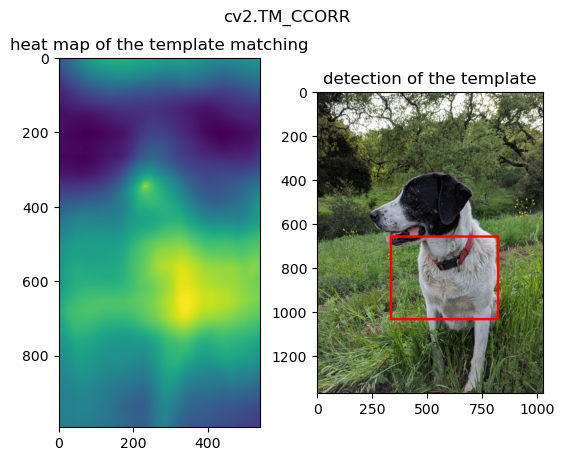

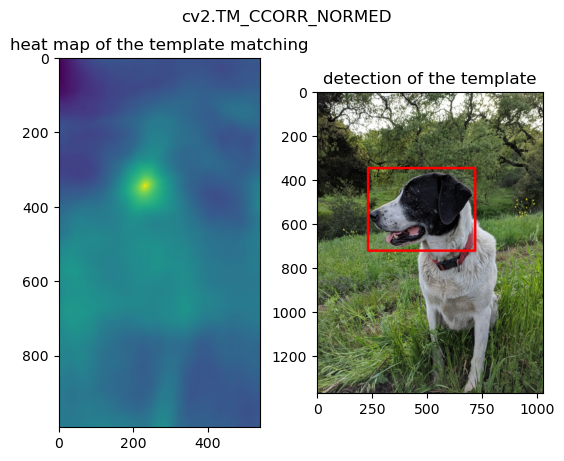

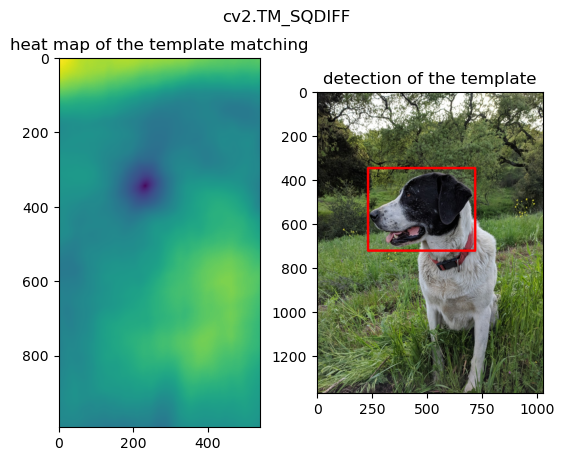

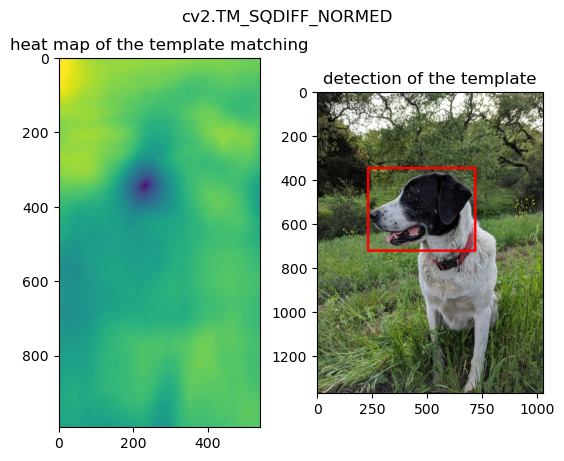

In [15]:
for m in methods:
    # CREATE A COPY because we are going to draw rectagle 
    full_copy = full.copy()
    
    method = eval(m)
    
    # Template matching
    res = cv2.matchTemplate(full_copy,face,method)

    min_value , max_value , min_loc , max_loc , = cv2.minMaxLoc(res)

    #set up everything to draw rectangel
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc # (x,y)
    else:
        top_left = max_loc

    height , width , channels = face.shape
    bottom_right = (top_left[0]+width , top_left[1]+height)

    # let's draw on the image
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)

    # plot and show images 
    plt.subplot(121) # two row - one collumn - grab the first one
    plt.imshow(res)
    plt.title( 'heat map of the template matching' )
    
    plt.subplot(122) # two row - one collumn - grab the second one
    plt.imshow(full_copy)
    plt.title( 'detection of the template' )
    
    #title with the method we used
    plt.suptitle(m)

    # to avoid rewrite subplot on each other
    plt.show()
    print('\n')
    print('\n')
    